In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
import os
from sklearn.externals import joblib

import jsonify
from pandas.io.json import json_normalize


import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15

import lightgbm as lgb
import xgboost as xgb
import time
from xgboost import XGBClassifier

import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import eli5
from IPython.display import HTML
import json

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


In [2]:
transaction_train_df = pd.read_csv('./data/train_transaction.csv')
identity_train_df = pd.read_csv('./data/train_identity.csv')

train = pd.merge(transaction_train_df,identity_train_df,how='left',
         on='TransactionID')


del transaction_train_df, identity_train_df
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [3]:
transaction_test_df = pd.read_csv('./data/test_transaction.csv')
identity_test_df = pd.read_csv('./data/test_identity.csv')

test = pd.merge(transaction_test_df,identity_test_df,how='left',
         on='TransactionID')


del transaction_test_df, identity_test_df
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.949999999999999,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000000000000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000000000000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.949999999999989,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950000000000003,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [8]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400000000000e+05,590540.000000000000000,5.905400000000000e+05,590540.000000000000000,590540.000000000000000,581607.000000000000000,588975.000000000000000,586281.000000000000000,524834.000000000000000,524834.000000000000000,...,139369.000000000000000,45113.000000000000000,139318.000000000000000,139261.000000000000000,5159.000000000000000,5169.000000000000000,4747.000000000000000,5132.000000000000000,5163.000000000000000,77586.000000000000000
mean,3.282269500000000e+06,0.034990009144173,7.372311310116165e+06,135.027176372938214,9898.734658109526208,362.555488499966486,153.194925081709755,199.278896979434762,290.733793923411952,86.800630294531217,...,189.451377279021870,14.237337352869462,353.128174392397227,403.882666360287544,368.269819732506278,16.002708454246470,12.800926901200759,329.608924395946985,149.070307960488094,26.508596911813989
std,1.704743583204291e+05,0.183754634179073,4.617223646539679e+06,239.162522013661288,4901.170153494702390,157.793246310177125,11.336443990237404,41.244452964948309,101.741071758218027,2.690623486038362,...,30.375360488606223,1.561301528050160,141.095343019162954,152.160327216252483,198.847038472720925,6.897664752694688,2.372446657786929,97.461088799116439,32.101994679765710,3.737502025099724
min,2.987000000000000e+06,0.000000000000000,8.640000000000000e+04,0.251000000000000,1000.000000000000000,100.000000000000000,100.000000000000000,100.000000000000000,100.000000000000000,10.000000000000000,...,100.000000000000000,10.000000000000000,100.000000000000000,100.000000000000000,100.000000000000000,10.000000000000000,11.000000000000000,100.000000000000000,100.000000000000000,0.000000000000000
25%,3.134634750000000e+06,0.000000000000000,3.027057750000000e+06,43.321000000000005,6019.000000000000000,214.000000000000000,150.000000000000000,166.000000000000000,204.000000000000000,87.000000000000000,...,166.000000000000000,13.000000000000000,266.000000000000000,256.000000000000000,252.000000000000000,14.000000000000000,11.000000000000000,321.000000000000000,119.000000000000000,24.000000000000000
50%,3.282269500000000e+06,0.000000000000000,7.306527500000000e+06,68.769000000000005,9678.000000000000000,361.000000000000000,150.000000000000000,226.000000000000000,299.000000000000000,87.000000000000000,...,166.000000000000000,15.000000000000000,341.000000000000000,472.000000000000000,252.000000000000000,14.000000000000000,11.000000000000000,321.000000000000000,149.000000000000000,24.000000000000000
75%,3.429904250000000e+06,0.000000000000000,1.124662000000000e+07,125.000000000000000,14184.000000000000000,512.000000000000000,150.000000000000000,226.000000000000000,330.000000000000000,87.000000000000000,...,225.000000000000000,15.000000000000000,427.000000000000000,533.000000000000000,486.500000000000000,14.000000000000000,15.000000000000000,371.000000000000000,169.000000000000000,32.000000000000000
max,3.577539000000000e+06,1.000000000000000,1.581113100000000e+07,31937.390999999999622,18396.000000000000000,600.000000000000000,231.000000000000000,237.000000000000000,540.000000000000000,102.000000000000000,...,229.000000000000000,29.000000000000000,671.000000000000000,661.000000000000000,854.000000000000000,44.000000000000000,26.000000000000000,548.000000000000000,216.000000000000000,32.000000000000000


In [9]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400000000000e+05,590540.000000000000000,5.905400000000000e+05,590540.000000000000000,590540.000000000000000,581607.000000000000000,588975.000000000000000,586281.000000000000000,524834.000000000000000,524834.000000000000000,...,139369.000000000000000,45113.000000000000000,139318.000000000000000,139261.000000000000000,5159.000000000000000,5169.000000000000000,4747.000000000000000,5132.000000000000000,5163.000000000000000,77586.000000000000000
mean,3.282269500000000e+06,0.034990009144173,7.372311310116165e+06,135.027176372938214,9898.734658109526208,362.555488499966486,153.194925081709755,199.278896979434762,290.733793923411952,86.800630294531217,...,189.451377279021870,14.237337352869462,353.128174392397227,403.882666360287544,368.269819732506278,16.002708454246470,12.800926901200759,329.608924395946985,149.070307960488094,26.508596911813989
std,1.704743583204291e+05,0.183754634179073,4.617223646539679e+06,239.162522013661288,4901.170153494702390,157.793246310177125,11.336443990237404,41.244452964948309,101.741071758218027,2.690623486038362,...,30.375360488606223,1.561301528050160,141.095343019162954,152.160327216252483,198.847038472720925,6.897664752694688,2.372446657786929,97.461088799116439,32.101994679765710,3.737502025099724
min,2.987000000000000e+06,0.000000000000000,8.640000000000000e+04,0.251000000000000,1000.000000000000000,100.000000000000000,100.000000000000000,100.000000000000000,100.000000000000000,10.000000000000000,...,100.000000000000000,10.000000000000000,100.000000000000000,100.000000000000000,100.000000000000000,10.000000000000000,11.000000000000000,100.000000000000000,100.000000000000000,0.000000000000000
25%,3.134634750000000e+06,0.000000000000000,3.027057750000000e+06,43.321000000000005,6019.000000000000000,214.000000000000000,150.000000000000000,166.000000000000000,204.000000000000000,87.000000000000000,...,166.000000000000000,13.000000000000000,266.000000000000000,256.000000000000000,252.000000000000000,14.000000000000000,11.000000000000000,321.000000000000000,119.000000000000000,24.000000000000000
50%,3.282269500000000e+06,0.000000000000000,7.306527500000000e+06,68.769000000000005,9678.000000000000000,361.000000000000000,150.000000000000000,226.000000000000000,299.000000000000000,87.000000000000000,...,166.000000000000000,15.000000000000000,341.000000000000000,472.000000000000000,252.000000000000000,14.000000000000000,11.000000000000000,321.000000000000000,149.000000000000000,24.000000000000000
75%,3.429904250000000e+06,0.000000000000000,1.124662000000000e+07,125.000000000000000,14184.000000000000000,512.000000000000000,150.000000000000000,226.000000000000000,330.000000000000000,87.000000000000000,...,225.000000000000000,15.000000000000000,427.000000000000000,533.000000000000000,486.500000000000000,14.000000000000000,15.000000000000000,371.000000000000000,169.000000000000000,32.000000000000000
max,3.577539000000000e+06,1.000000000000000,1.581113100000000e+07,31937.390999999999622,18396.000000000000000,600.000000000000000,231.000000000000000,237.000000000000000,540.000000000000000,102.000000000000000,...,229.000000000000000,29.000000000000000,671.000000000000000,661.000000000000000,854.000000000000000,44.000000000000000,26.000000000000000,548.000000000000000,216.000000000000000,32.000000000000000


## Exploratory analysis 

In [10]:
print("Total Observations: {}".format(train.count()[0]))
print("Number of Features: {}".format(len(train.columns)))
print('Column names: {}'.format(train.columns))

Total Observations: 590540
Number of Features: 434
Column names: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)


In [11]:
print("Total Observations: {}".format(train.count()[0]))
print("Number of Features: {}".format(len(train.columns)))
print('Column names: {}'.format(train.columns))

Total Observations: 590540
Number of Features: 434
Column names: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)


Lets first explore the transaction table as it has variety of columns

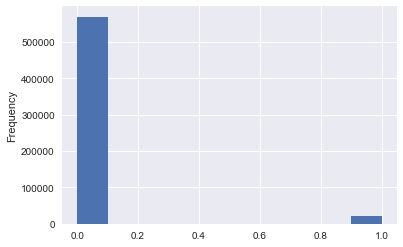

In [12]:
train.isFraud.plot(kind='hist')

Above plot shows the fraud transactions are very less compared to non fraud transactions and it is heavily imbalanced

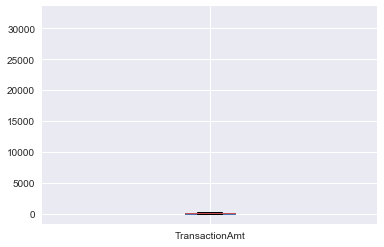

In [13]:
train.TransactionAmt.plot(kind='box')

Seems the transaction amount is heavily skewed.  

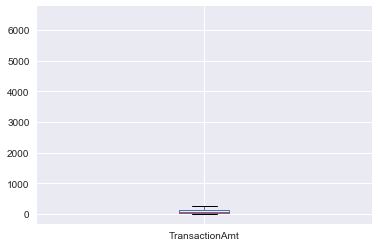

In [14]:
train.TransactionAmt[train.TransactionAmt < 30000].plot(kind='box')

In [15]:
#Except couple of transactions the average transaction amount is ~$135
train.TransactionAmt[train.TransactionAmt < 30000].mean()

134.91946996344856

In [16]:
#fraud transaction mean amount
train.TransactionAmt[train.isFraud ==1].mean()

149.2447785897534

In [17]:
train.TransactionAmt[train.isFraud ==1].count()

20663

In [18]:
#Total percentage of fraud transactions
train.TransactionAmt[train.isFraud ==1].count()/train.count()[0]

0.03499000914417313

In [19]:
#Top 5 transaction amount
train.TransactionAmt.sort_values(ascending=False).head()

274339    31937.390999999999622
274336    31937.390999999999622
296021     6450.970000000000255
248413     6085.229999999999563
384603     5543.229999999999563
Name: TransactionAmt, dtype: float64

In [20]:
tns_fraud_train_df = train[train.isFraud==1]
tns_fraud_train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
203,2987203,1,89760,445.000000000000000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.097999999999999,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
243,2987243,1,90246,37.097999999999999,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
245,2987245,1,90295,37.097999999999999,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
288,2987288,1,90986,155.521000000000015,C,16578,545.0,185.0,visa,226.0,...,chrome 62.0 for ios,NaN,NaN,NaN,F,F,F,F,mobile,NaN


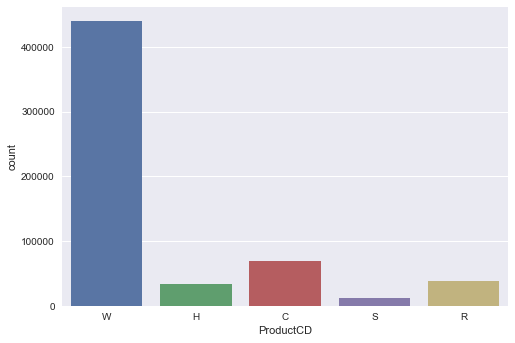

In [21]:
sns.set(style="darkgrid")
sns.countplot(x='ProductCD',data=train)

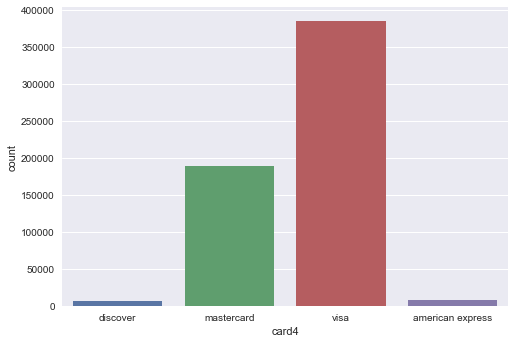

In [22]:
#Below plot shows that the visa cards has highest transactions
sns.countplot(x='card4',data=train)


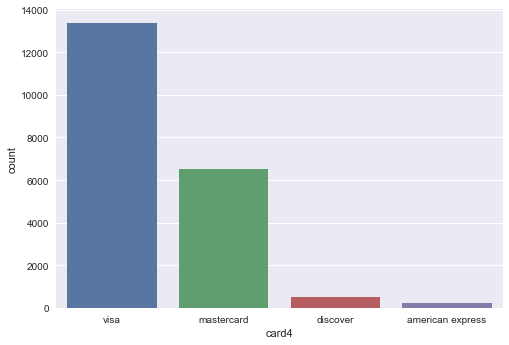

In [23]:
sns.countplot(x='card4',data=tns_fraud_train_df)

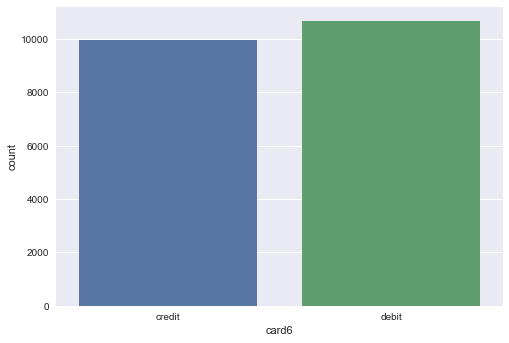

In [24]:
sns.countplot(x='card6',data=tns_fraud_train_df)

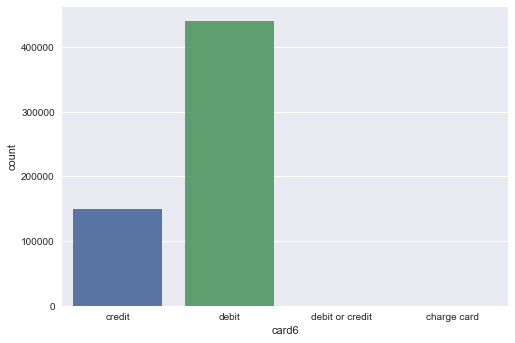

In [25]:
sns.countplot(x='card6',data=train)

In [26]:
len(train.card6.unique())

5

In [27]:
train.card6.unique()

array(['credit', 'debit', nan, 'debit or credit', 'charge card'],
      dtype=object)

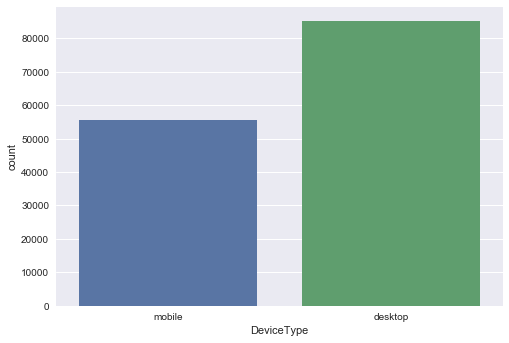

In [28]:
sns.countplot(x='DeviceType',data=train)

In [29]:
len(train.DeviceInfo.unique())

1787

In [30]:
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

## Transformations

In [31]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')


There are 414 columns in train dataset with missing values.


In [32]:
train[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] =  train['P_emaildomain'].str.split('.', expand=True)

train[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = train['R_emaildomain'].str.split('.', expand=True)

In [33]:
test[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = test['P_emaildomain'].str.split('.', expand=True)
test[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = test['R_emaildomain'].str.split('.', expand=True)

In [34]:
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

In [35]:
many_null_cols

['dist2',
 'D7',
 'id_07',
 'id_08',
 'id_18',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'P_emaildomain_3',
 'R_emaildomain_3']

In [36]:
many_null_cols_test

['dist2',
 'id_07',
 'id_08',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'P_emaildomain_3',
 'R_emaildomain_3']

In [37]:
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [38]:
train['dist2'].value_counts(dropna=False, normalize=True).values[0] > 0.9

True

In [39]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]
one_value_cols == one_value_cols_test

False

In [40]:
one_value_cols_test

['V107']

In [41]:
cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test + one_value_cols+ one_value_cols_test))
cols_to_drop.remove('isFraud')
len(cols_to_drop)

84

In [42]:
train.drop(cols_to_drop, axis=1,inplace=True)
test.drop(cols_to_drop, axis=1,inplace=True)

In [43]:
cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
            'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']

In [44]:
len(train.addr1.unique())

333

In [45]:
for col in cat_cols:
    if col in train.columns:
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))
        test[col] = le.transform(list(test[col].astype(str).values))   

In [46]:
len(train.columns)
len(test.columns)

355

In [47]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,P_emaildomain_1,P_emaildomain_2,R_emaildomain_1,R_emaildomain_2
0,2987000,0,86400,68.5,4,4248,501,50,1,42,...,2,2,2,2,2,2740,25,7,25,7
1,2987001,0,86401,29.0,4,9979,304,50,2,2,...,2,2,2,2,2,2740,15,2,25,7
2,2987002,0,86469,59.0,4,11850,390,50,4,66,...,2,2,2,2,2,2740,28,2,25,7
3,2987003,0,86499,50.0,4,8796,467,50,2,17,...,2,2,2,2,2,2740,44,2,25,7
4,2987004,0,86506,50.0,1,11687,414,50,2,2,...,1,0,1,1,1,1565,15,2,25,7


In [48]:
X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y = train.sort_values('TransactionDT')['isFraud']
#X_test = test.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)
X_test = test.drop(['TransactionDT', 'TransactionID'], axis=1)
#del train
#test = test[['TransactionID']]

In [49]:
# by https://www.kaggle.com/dimartinot
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
X = clean_inf_nan(X)
X_test = clean_inf_nan(X_test )

In [50]:
gc.collect()

138

In [51]:
#del train

In [107]:
#Simple xgbclassifier with default parameters
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [109]:
y_proba = model.predict_proba(X_test)

In [110]:
sub = test[['TransactionID']]

In [120]:
y_proba[:,0]

array([0.9936508 , 0.9879607 , 0.9811067 , ..., 0.9870636 , 0.98451936,
       0.97595614], dtype=float32)

In [121]:
sub['isFraud'] = pd.Series(y_proba[:,0])

In [130]:
sub.to_csv(path_or_buf='./data/submission.csv',sep=',',index=False,header=['TransactionID','isFraud'])

In [131]:
!kaggle competitions submit -c ieee-fraud-detection -f submission.csv -m "first submit"

Successfully submitted to IEEE-CIS Fraud Detection



  0%|          | 0.00/9.35M [00:00<?, ?B/s]
  3%|3         | 288k/9.35M [00:00<00:03, 2.95MB/s]
  7%|6         | 640k/9.35M [00:00<00:02, 3.08MB/s]
 12%|#1        | 1.10M/9.35M [00:00<00:02, 3.48MB/s]
 21%|##        | 1.92M/9.35M [00:00<00:01, 4.23MB/s]
 29%|##9       | 2.73M/9.35M [00:00<00:01, 4.97MB/s]
 38%|###7      | 3.54M/9.35M [00:00<00:01, 5.65MB/s]
 47%|####6     | 4.35M/9.35M [00:00<00:00, 6.27MB/s]
 55%|#####5    | 5.18M/9.35M [00:00<00:00, 6.83MB/s]
 65%|######4   | 6.03M/9.35M [00:00<00:00, 7.33MB/s]
 73%|#######3  | 6.83M/9.35M [00:01<00:00, 7.61MB/s]
 82%|########1 | 7.66M/9.35M [00:01<00:00, 7.88MB/s]
 91%|######### | 8.47M/9.35M [00:01<00:00, 8.06MB/s]
100%|#########9| 9.30M/9.35M [00:01<00:00, 8.24MB/s]
100%|##########| 9.35M/9.35M [00:01<00:00, 5.83MB/s]


In [59]:


joblib.dump(model, 'trained_model.pkl')


model = joblib.load('trained_model.sav')


model.predict_proba(X_test.iloc[:1])

X_test.dtypes

pd.read_json(X_test.iloc[:1].to_json())

In [57]:
X_test.iloc[:1].to_json(orient='records')

'[{"TransactionAmt":31.95,"ProductCD":4,"card1":442,"card2":11,"card3":50,"card4":4,"card5":126,"card6":2,"addr1":70,"addr2":80,"dist1":1.0,"P_emaildomain":16,"R_emaildomain":32,"C1":6.0,"C2":6.0,"C4":0.0,"C5":3.0,"C6":4.0,"C7":0.0,"C8":0.0,"C9":6.0,"C10":0.0,"C11":5.0,"C12":1.0,"C13":115.0,"C14":6.0,"D1":419.0,"D2":419.0,"D3":27.0,"D4":398.0,"D5":27.0,"D6":null,"D8":null,"D9":null,"D10":418.0,"D11":203.0,"D12":null,"D13":null,"D14":null,"D15":409.0,"M1":1,"M2":1,"M3":0,"M4":3,"M5":2,"M6":0,"M7":1,"M8":1,"M9":1,"V1":1.0,"V2":1.0,"V3":1.0,"V4":1.0,"V5":1.0,"V6":1.0,"V7":1.0,"V8":1.0,"V9":1.0,"V10":1.0,"V11":1.0,"V12":0.0,"V13":0.0,"V15":0.0,"V16":0.0,"V17":0.0,"V18":0.0,"V19":0.0,"V20":0.0,"V21":0.0,"V22":0.0,"V29":0.0,"V30":0.0,"V31":0.0,"V32":0.0,"V33":0.0,"V34":0.0,"V35":1.0,"V36":1.0,"V37":1.0,"V38":1.0,"V39":0.0,"V40":0.0,"V41":1.0,"V42":0.0,"V43":0.0,"V44":1.0,"V45":1.0,"V46":1.0,"V47":1.0,"V48":1.0,"V49":1.0,"V50":0.0,"V51":0.0,"V52":0.0,"V53":0.0,"V54":0.0,"V56":1.0,"V57":0.0,"V